# Refactoring a cura di Giulio, Jacopo e Mohammed



Installiamo le librerie necessarie:

In [ ]:
# Librerie da installare
install.packages(c('httr', 'readr', 'data.table', 'psych', 'htmltab', 'stringi', 'bizdays', 'stringr', 'dplyr', 'lubridate', 'zoo', 'reshape2'))

# Parte 1 - REST API

## Consuming APIs and JSON

In [1]:
library(httr)

WScall <- function(endpoint, parameters) {
    result <- GET(endpoint, query = parameters)
    return(result)
}

ad <- "1600 Pennsylvania Avenue, Washington, DC"
urla <- "http://nominatim.openstreetmap.org/search"
paramA <- list(q = ad, addressdetails = 1, format = "json")

resA <- WScall(urla, paramA)

if (resA$status_code == 200) {
    adrjson <- content(resA, as = "parsed")
    lat = adrjson[[1]]$lat
    lon = adrjson[[1]]$lon
}

urlw <- "http://forecast.weather.gov/MapClick.php"
paramW <- list(lat = lat, lon = lon, FcstType = "json")

resW <- WScall(urlw, paramW)

if (resW$status_code == 200) {
    weajson <- content(resW, as = "parsed")
    weajson$currentobservation
}

Warning message:
"package 'httr' was built under R version 3.3.3"

$id
[1] "KDCA"

$name
[1] "Washington/Reagan National Airport, DC"

$elev
[1] "13"

$latitude
[1] "38.85"

$longitude
[1] "-77.03"

$Date
[1] "22 Jun 04:52 am EDT"

$Temp
[1] "76"

$Dewp
[1] "70"

$Relh
[1] "82"

$Winds
[1] "3"

$Windd
[1] "310"

$Gust
[1] "0"

$Weather
[1] "Mostly Cloudy"

$Weatherimage
[1] "nbkn.png"

$Visibility
[1] "10.00"

$Altimeter
[1] "1015.5"

$SLP
[1] "29.99"

$timezone
[1] "EDT"

$state
[1] "VA"

$WindChill
[1] "NA"

# Parte 2 - Libreria PANDAS

## Nouns (objects) in Pandas
### Data Frames
Con due vettori creo il dataframe

In [2]:
number = c(1, 2, 3)
animal = c('cat', 'dog', 'mouse')
df1 = data.frame(number, animal)
df1

df1$animal

number,animal
1,cat
2,dog
3,mouse


[1] cat   dog   mouse
Levels: cat dog mouse

1)Richiamo la colonna "animal" del data frame.

2)Estraggo gli elementi della colonna "animal" come una lista.

3)Per creare un data frame possiamo anche operare in altri modi.

4)Con la libreria compare posso confrontare i due data frame.

In [3]:
df1["animal"] #1

as.list(df1$animal) #2

df2 <- data.frame(animal=animal, number= number) #3
df2
df2 <- as.data.frame(cbind(animal,number)) #3
df2

library(compare)   #4
compare(df1,df2,allowAll=TRUE)

animal
cat
dog
mouse


[[1]]
[1] cat
Levels: cat dog mouse

[[2]]
[1] dog
Levels: cat dog mouse

[[3]]
[1] mouse
Levels: cat dog mouse

animal,number
cat,1
dog,2
mouse,3


animal,number
cat,1
dog,2
mouse,3


ERROR: Error in library(compare): there is no package called 'compare'


# Verbs (operations) in Pandas
## Loading data (and basic statistics / visualization)

Warning message:
"package 'readr' was built under R version 3.3.3"Parsed with column specification:
cols(
  State_Code = col_character(),
  County_Code = col_character(),
  Census_Tract_Number = col_character(),
  NUM_ALL = col_integer(),
  NUM_FHA = col_integer(),
  PCT_NUM_FHA = col_integer(),
  AMT_ALL = col_integer(),
  AMT_FHA = col_integer(),
  PCT_AMT_FHA = col_integer()
)
Warning message:
"115232 parsing failures.
 row         col               expected actual
1217 PCT_NUM_FHA no trailing characters  .9091
1217 PCT_AMT_FHA no trailing characters  .7336
1218 PCT_NUM_FHA no trailing characters  .3333
1218 PCT_AMT_FHA no trailing characters  .6689
1219 PCT_NUM_FHA no trailing characters  .9091
.... ........... ...................... ......
See problems(...) for more details.
"

State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA
08,075,NA,1,1,100,258,258,100
28,049,0103.01,1,1,100,71,71,100
40,003,NA,1,1,100,215,215,100
39,113,0603.00,3,3,100,206,206,100
12,105,0124.04,2,2,100,303,303,100
12,086,9808.00,1,1,100,188,188,100


State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID
08,075,NA,1,1,100,258,258,100,NA
28,049,0103.01,1,1,100,71,71,100,28049010301
40,003,NA,1,1,100,215,215,100,NA
39,113,0603.00,3,3,100,206,206,100,39113060300
12,105,0124.04,2,2,100,303,303,100,12105012404
12,086,9808.00,1,1,100,188,188,100,12086980800


State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID
NA,NA,NA,9477,1932,NA,1575871,331515,NA,NA
01,NA,NA,15,1,NA,2812,114,NA,NA
01,001,0201.00,8,5,NA,1319,754,NA,1001020100
01,001,0203.00,38,20,NA,3605,1928,NA,1001020300
01,001,0204.00,30,16,NA,3628,1800,NA,1001020400
01,001,0207.00,17,7,NA,1832,889,NA,1001020700


X.State_Code,County_Code,Census_Tract_Number,X...NUM_ALL,X...NUM_FHA,X.PCT_NUM_FHA,X...AMT_ALL,X...AMT_FHA,X.PCT_AMT_FHA,X...GEOID
Length:72035,Length:72035,Length:72035,Min. : 1.00,Min. : 0.000,Min. : 0.0,Min. : 2,Min. : 0,Min. : 0.00,Length:72035
Class :character,Class :character,Class :character,1st Qu.: 13.00,1st Qu.: 2.000,1st Qu.: 0.0,1st Qu.: 1551,1st Qu.: 281,1st Qu.: 0.00,Class :character
Mode :character,Mode :character,Mode :character,Median : 27.00,Median : 6.000,Median : 20.0,Median : 4168,Median : 932,Median : 0.00,Mode :character
NA,NA,NA,Mean : 36.97,Mean : 9.742,Mean : 26.3,Mean : 7886,Mean : 1689,Mean : 13.95,NA
NA,NA,NA,3rd Qu.: 48.00,3rd Qu.: 13.000,3rd Qu.: 50.0,3rd Qu.: 9668,3rd Qu.: 2197,3rd Qu.: 0.00,NA
NA,NA,NA,Max. :9477.00,Max. :1932.000,Max. :100.0,Max. :1575871,Max. :331515,Max. :100.00,NA
NA,NA,NA,NA,NA,NA's :52383,NA,NA,NA's :62849,NA


Classes 'data.table' and 'data.frame':	72035 obs. of  10 variables:
 $ State_Code         : chr  NA "01" "01" "01" ...
 $ County_Code        : chr  NA NA "001" "001" ...
 $ Census_Tract_Number: chr  NA NA "0201.00" "0203.00" ...
 $ NUM_ALL            : int  9477 15 8 38 30 17 28 12 164 23 ...
 $ NUM_FHA            : int  1932 1 5 20 16 7 12 5 45 5 ...
 $ PCT_NUM_FHA        : int  NA NA NA NA NA NA NA NA NA NA ...
 $ AMT_ALL            : int  1575871 2812 1319 3605 3628 1832 4076 1241 29091 4072 ...
 $ AMT_FHA            : int  331515 114 754 1928 1800 889 1493 414 7348 809 ...
 $ PCT_AMT_FHA        : int  NA NA NA NA NA NA NA NA NA NA ...
 $ GEOID              : chr  NA NA "1001020100" "1001020300" ...
 - attr(*, "problems")=Classes 'tbl_df', 'tbl' and 'data.frame':	115232 obs. of  4 variables:
  ..$ row     : int  1217 1217 1218 1218 1219 1219 1220 1220 1221 1221 ...
  ..$ col     : chr  "PCT_NUM_FHA" "PCT_AMT_FHA" "PCT_NUM_FHA" "PCT_AMT_FHA" ...
  ..$ expected: chr  "no trailing char

Warning message:
"package 'psych' was built under R version 3.3.3"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to min; returning Inf"Warning message in FUN(newX[, i], ...):
"no non-missing arguments to max; returning -Inf"Warning message in FUN(newX[, i], ...):
"no non-m

$`0`
                     vars    n         mean           sd      median
State_Code*             1 7817 2.783000e+01 1.583000e+01          28
County_Code*            2 7809 8.231000e+01 8.721000e+01          61
Census_Tract_Number*    3 7041 3.202500e+03 3.919040e+03         635
NUM_ALL                 4 7817 1.430000e+01 1.942000e+01           7
NUM_FHA                 5 7817 0.000000e+00 0.000000e+00           0
PCT_NUM_FHA             6 7817 0.000000e+00 0.000000e+00           0
AMT_ALL                 7 7817 6.175040e+03 1.387847e+04        1007
AMT_FHA                 8 7817 0.000000e+00 0.000000e+00           0
PCT_AMT_FHA             9 7817 0.000000e+00 0.000000e+00           0
GEOID*                 10 7041 2.763268e+10 1.582980e+10 28049011500
                          trimmed          mad        min          max
State_Code*          2.744000e+01 1.779000e+01          1 7.200000e+01
County_Code*         6.796000e+01 5.041000e+01          1 8.100000e+02
Census_Tract_Number* 2.

Warning message in describeBy(dt):
"no grouping variable requested"

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
State_Code*,1,72034,2.832253e+01,1.645951e+01,2.8000e+01,2.797935e+01,2.075640e+01,1,7.200000e+01,7.100000e+01,0.1261613,-0.9389424,6.132648e-02
County_Code*,2,71984,8.561264e+01,9.867245e+01,6.3000e+01,6.839734e+01,5.633880e+01,1,8.400000e+02,8.390000e+02,3.5084487,16.8166831,3.677714e-01
Census_Tract_Number*,3,71040,2.534598e+03,3.451173e+03,4.4201e+02,1.966209e+03,6.375328e+02,1,9.922010e+03,9.921010e+03,1.1525064,-0.2892461,1.294838e+01
NUM_ALL,4,72035,3.697039e+01,5.397540e+01,2.7000e+01,3.035713e+01,2.520420e+01,1,9.477000e+03,9.476000e+03,77.3654856,13050.6935891,2.011056e-01
NUM_FHA,5,72035,9.741667e+00,1.518783e+01,6.0000e+00,7.359871e+00,7.413000e+00,0,1.932000e+03,1.932000e+03,32.6980031,3637.8857999,5.658795e-02
PCT_NUM_FHA,6,19652,2.629671e+01,2.960854e+01,2.0000e+01,2.144594e+01,2.965200e+01,0,1.000000e+02,1.000000e+02,1.0157409,0.1423405,2.112096e-01
AMT_ALL,7,72035,7.886092e+03,1.302542e+04,4.1680e+03,5.578390e+03,4.728011e+03,2,1.575871e+06,1.575869e+06,28.7047504,2993.0459879,4.853108e+01
AMT_FHA,8,72035,1.689279e+03,2.800346e+03,9.3200e+02,1.226009e+03,1.160876e+03,0,3.315150e+05,3.315150e+05,27.4618853,2738.1414611,1.043374e+01
PCT_AMT_FHA,9,9186,1.395254e+01,3.416098e+01,0.0000e+00,4.948027e+00,0.000000e+00,0,1.000000e+02,1.000000e+02,2.0845697,2.3970931,3.564241e-01
GEOID*,10,71040,2.837319e+10,1.648784e+10,2.8049e+10,2.802304e+10,2.081897e+10,1001020100,7.215375e+10,7.115273e+10,0.1285231,-0.9406118,6.186035e+07


Warning message in `[<-.data.table`(x, j = name, value = value):
"Supplied 72034 items to be assigned to 72035 items of column 'LOG_AMT_ALL' (recycled leaving remainder of 1 items)."

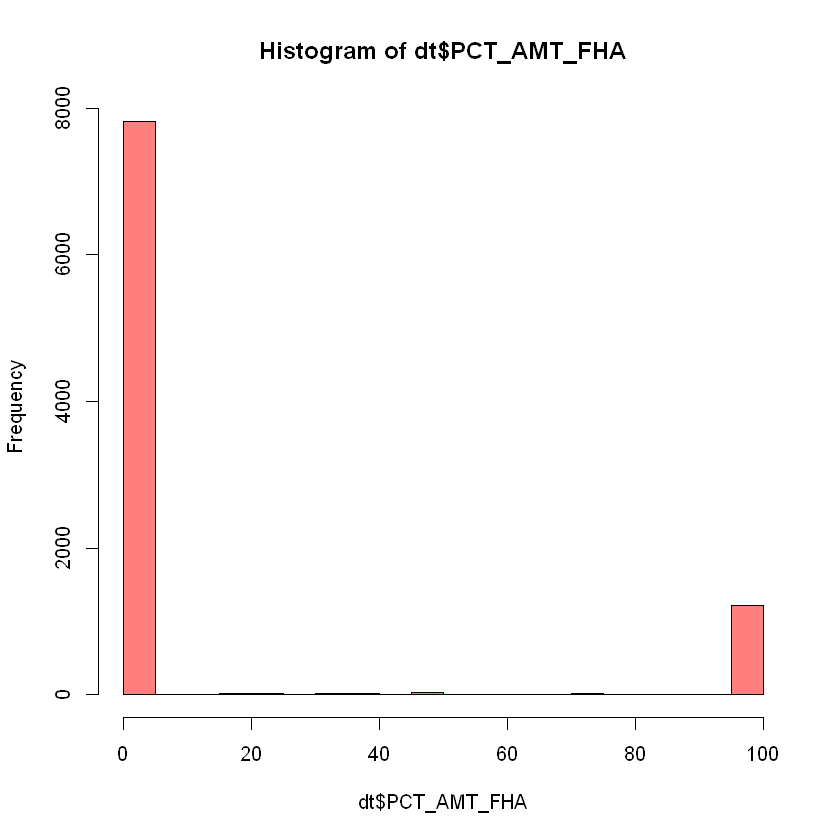

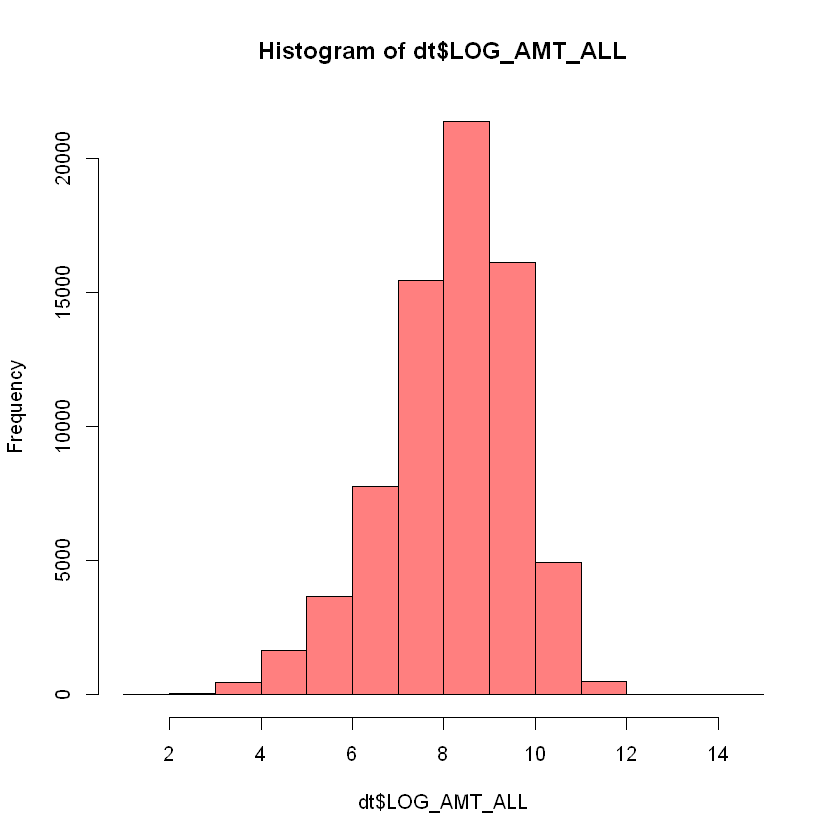

In [4]:
library(readr)
library(data.table)
names = c("State_Code", "County_Code", "Census_Tract_Number", "NUM_ALL", "NUM_FHA", "PCT_NUM_FHA", "AMT_ALL", "AMT_FHA", "PCT_AMT_FHA")
dt = as.data.table(read_csv("C:/Users/GiulioVannini/Documents/Visual Studio 2017/Projects/MABIDA2017/Gigli/Management science/Data/fha_by_tract.csv", col_names = names))
head(dt)

#inseriamo una nuova colonna GEOID nel dataframe

dt$GEOID = as.character(with(dt, as.numeric(Census_Tract_Number) * 100 + 10 ^ 6 * as.numeric(County_Code) + 10 ^ 9 * as.numeric(State_Code)  ))
head(dt)

# df$GEOID = NULL # per escludere la colonna... ma perche' dovremmo dropparla?

df = dt[-1,]

# Indici su data frame
setkey(dt, State_Code, County_Code)
head(dt)
data.frame(unclass(summary(dt)))

str(dt)

library(psych)
describeBy(dt, dt$PCT_AMT_FHA)
describeBy(dt)
hist(dt$PCT_AMT_FHA, col = rgb(1, 0, 0, 0.5))

#Creo una nuova colonna applicando il logaritmo ai valori di AMT_ALL del data frame

dt$LOG_AMT_ALL = log1p(df$AMT_ALL)
hist(dt$LOG_AMT_ALL, col = rgb(1, 0, 0, 0.5))

# Indexing data frames

In [5]:
head(dt$State_Code) #ottengo i valori della colonna

head(dt[,c(State_Code, County_Code)])  #opero su sottoinsieme del dataframe
head(dt[, County_Code, keyby = State_Code])
str(df$State_Code)

dt[12550,]

dt[12550, 'State_Code'] #riferimenti misti

dt[12545:12550, County_Code, keyby = State_Code]

dt[3, 5]

dt[3:5, 2:4]

[1] NA   "01" "01" "01" "01" "01"

[1] NA   "01" "01" "01" "01" "01"

State_Code,County_Code
NA,NA
01,NA
01,001
01,001
01,001
01,001


 chr [1:72034] "28" "40" "39" "12" "12" "39" "12" "36" ...


State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
08,123,0007.05,14,3,NA,2637,401,NA,8123000705,7.982075


State_Code
08


State_Code,County_Code
08,123
08,123
08,123
08,123
08,123
08,123


NUM_FHA
5


County_Code,Census_Tract_Number,NUM_ALL
001,0201.00,8
001,0203.00,38
001,0204.00,30


# Filtering data

In [6]:
head(subset(dt, State_Code == 33)) #Creo un sottoindieme del data frame per valori di State_Code corrispondenti a 33.
head(subset(dt, (State_Code == 33) | (Census_Tract_Number == 9613))) #Sottoinsieme con State_Code=33 | Census_Tract_Number=9613
dt[State_Code == 33]

State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
33,001,9655.98,26,10,NA,3366,1473,NA,33001965598,8.791790
33,001,9659.00,16,5,NA,1708,650,NA,33001965900,10.200476
33,001,9658.00,41,13,NA,6157,2207,NA,33001965800,6.899723
33,001,9656.00,42,13,NA,7121,2111,NA,33001965600,9.933726
33,001,9664.02,50,15,30,8751,2224,NA,33001966402,9.680281
33,001,9660.00,30,7,NA,4836,1094,NA,33001966000,9.065315


State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
33,001,9655.98,26,10,NA,3366,1473,NA,33001965598,8.791790
33,001,9659.00,16,5,NA,1708,650,NA,33001965900,10.200476
33,001,9658.00,41,13,NA,6157,2207,NA,33001965800,6.899723
33,001,9656.00,42,13,NA,7121,2111,NA,33001965600,9.933726
33,001,9664.02,50,15,30,8751,2224,NA,33001966402,9.680281
33,001,9660.00,30,7,NA,4836,1094,NA,33001966000,9.065315


State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
33,001,9655.98,26,10,NA,3366,1473,NA,33001965598,8.791790
33,001,9659.00,16,5,NA,1708,650,NA,33001965900,10.200476
33,001,9658.00,41,13,NA,6157,2207,NA,33001965800,6.899723
33,001,9656.00,42,13,NA,7121,2111,NA,33001965600,9.933726
33,001,9664.02,50,15,30,8751,2224,NA,33001966402,9.680281
33,001,9660.00,30,7,NA,4836,1094,NA,33001966000,9.065315
33,001,9657.00,54,12,NA,7388,1558,NA,33001965700,8.294550
33,001,9651.00,22,4,NA,3817,647,NA,33001965100,9.985436
33,001,9661.00,51,8,NA,9032,1506,NA,33001966100,9.600963
33,001,9654.00,27,6,NA,5969,971,NA,33001965400,9.372884


# Joining data

In [7]:
dt2 = as.data.table(read_tsv("C:/Users/GiulioVannini/Documents/Visual Studio 2017/Projects/MABIDA2017/Gigli/Management science/Data/2013_Gaz_tracts_national.tsv", col_names = T))
head(dt2)
dt$GEOID = as.character(with(dt, as.numeric(Census_Tract_Number) * 100 + 10 ^ 6 * as.numeric(County_Code) + 10 ^ 9 * as.numeric(State_Code)))
dt_joined = dt[dt2, on = "GEOID"]
head(dt_joined)

Parsed with column specification:
cols(
  USPS = col_character(),
  GEOID = col_character(),
  ALAND = col_integer(),
  AWATER = col_integer(),
  ALAND_SQMI = col_double(),
  AWATER_SQMI = col_double(),
  INTPTLAT = col_double(),
  INTPTLONG = col_double()
)
Warning message:
"698 parsing failures.
 row    col   expected      actual
1182 ALAND  an integer 18082854844
1182 AWATER an integer 20793145269
1183 ALAND  an integer 8547315155 
1183 AWATER an integer 22088655933
1184 ALAND  an integer 2823181227 
.... ...... .......... ...........
See problems(...) for more details.
"

USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
AL,01001020100,9809939,36312,3.788,0.014,32.48179,-86.49025
AL,01001020200,3340498,5846,1.290,0.002,32.47576,-86.47247
AL,01001020300,5349274,9054,2.065,0.003,32.47402,-86.45970
AL,01001020400,6382705,16244,2.464,0.006,32.47103,-86.44484
AL,01001020500,11397734,48412,4.401,0.019,32.45892,-86.42182
AL,01001020600,8020363,60048,3.097,0.023,32.44737,-86.47683


State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL,USPS,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020100,NA,AL,9809939,36312,3.788,0.014,32.48179,-86.49025
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020200,NA,AL,3340498,5846,1.290,0.002,32.47576,-86.47247
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020300,NA,AL,5349274,9054,2.065,0.003,32.47402,-86.45970
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020400,NA,AL,6382705,16244,2.464,0.006,32.47103,-86.44484
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020500,NA,AL,11397734,48412,4.401,0.019,32.45892,-86.42182
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020600,NA,AL,8020363,60048,3.097,0.023,32.44737,-86.47683


# Aggregating data

Warning message:
"package 'dplyr' was built under R version 3.3.3"------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL,USPS,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020100,NA,AL,9809939,36312,3.788,0.014,32.48179,-86.49025
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020200,NA,AL,3340498,5846,1.290,0.002,32.47576,-86.47247
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020300,NA,AL,5349274,9054,2.065,0.003,32.47402,-86.45970
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020400,NA,AL,6382705,16244,2.464,0.006,32.47103,-86.44484
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020500,NA,AL,11397734,48412,4.401,0.019,32.45892,-86.42182
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020600,NA,AL,8020363,60048,3.097,0.023,32.44737,-86.47683
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020700,NA,AL,22414817,775005,8.654,0.299,32.43035,-86.43697
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020801,NA,AL,124278423,8117643,47.984,3.134,32.41808,-86.52714
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020802,NA,AL,190810946,678013,73.673,0.262,32.54664,-86.53123
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020900,NA,AL,292756803,516150,113.034,0.199,32.63701,-86.51495


USPS,count,AMT_FHA,AMT_ALL,NUM_FHA,NUM_ALL
AK,167,NA,NA,NA,NA
AL,1181,NA,NA,NA,NA
AR,686,NA,NA,NA,NA
AZ,1526,NA,NA,NA,NA
CA,8057,NA,NA,NA,NA
CO,1249,NA,NA,NA,NA


USPS,count,sum_NUM_FHA,mean_NUM_ALL
AK,167,NA,NA
AL,1181,NA,NA
AR,686,NA,NA
AZ,1526,NA,NA
CA,8057,NA,NA
CO,1249,NA,NA


State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL,USPS,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
NA,NA,NA,NA,NA,NA,NA,NA,NA,02185000100,NA,AK,253241600,378198536,97.777,146.023,71.28794,-156.6856


[1] "State_Code"          "County_Code"         "Census_Tract_Number"
 [4] "NUM_ALL"             "NUM_FHA"             "PCT_NUM_FHA"        
 [7] "AMT_ALL"             "AMT_FHA"             "PCT_AMT_FHA"        
[10] "GEOID"               "LOG_AMT_ALL"         "USPS"               
[13] "ALAND"               "AWATER"              "ALAND_SQMI"         
[16] "AWATER_SQMI"         "INTPTLAT"            "INTPTLONG"

USPS,farthest_north
AK,71.28794
AL,34.96529
AR,36.48628
AZ,36.91659
CA,41.94665
CO,40.92410
CT,42.02461
DC,38.98497
DE,39.83222
FL,30.96749


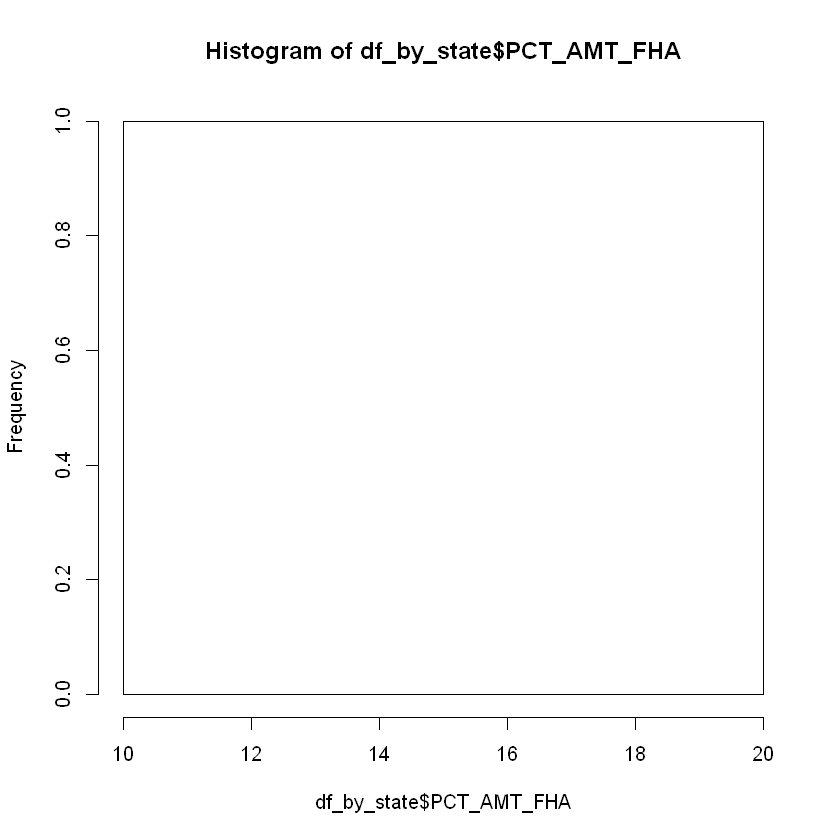

In [8]:
library(dplyr)
usps_groups = group_by(dt_joined, USPS)
usps_groups
group_AK_5 <- filter(usps_groups, USPS == 'AK')[5,] #filtro

df_by_state <- summarise(usps_groups, count = n(), AMT_FHA = sum(AMT_FHA), AMT_ALL = sum(AMT_ALL), NUM_FHA = sum(NUM_FHA), NUM_ALL = sum(NUM_ALL))
head(df_by_state)

df_by_state$PCT_AMT_FHA <- 100.0 * df_by_state$AMT_FHA / df_by_state$AMT_ALL

hist(df_by_state$PCT_AMT_FHA, breaks = 20)

df_by_state2 <- summarise(usps_groups, count = n(), sum_NUM_FHA = sum(NUM_FHA), mean_NUM_ALL = mean(NUM_ALL))
head(df_by_state2)
dplyr::arrange(usps_groups, desc(INTPTLAT))[1,]
names(usps_groups)

#Funzione per cui, per ogni valore di USPS ottengo il massimo di INTPTLAT               
farthest_north <- function(state_df) {
    result <- dplyr::arrange(state_df, desc(INTPTLAT))[1,]
    return(result)
}

#Creo un dataframe che mi restituisce il valore massimo trovato nella colonna INTPTLAT per valore univoco di USPS 
northest <- summarise(usps_groups, farthest_north = max(INTPTLAT))
northest

# Sorting by indices and columns

In [9]:
dtbystate = dt[order(State_Code)]
dtbystate
dtbyAMTFHA = dt[order(AMT_FHA)]
dtbyAMTFHA

State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
01,NA,NA,15,1,NA,2812,114,NA,NA,5.375278
01,001,0201.00,8,5,NA,1319,754,NA,1001020100,5.332719
01,001,0203.00,38,20,NA,3605,1928,NA,1001020300,5.717028
01,001,0204.00,30,16,NA,3628,1800,NA,1001020400,5.241747
01,001,0207.00,17,7,NA,1832,889,NA,1001020700,2.995732
01,001,0206.00,28,12,NA,4076,1493,NA,1001020600,4.615121
01,001,0202.00,12,5,NA,1241,414,NA,1001020200,5.872118
01,001,0208.02,164,45,NA,29091,7348,NA,1001020802,5.365976
01,001,0209.00,23,5,NA,4072,809,NA,1001020900,4.174387
01,001,0205.00,104,25,NA,18591,3692,NA,1001020500,3.828641


State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
01,003,0114.08,63,0,0,12889,0,0,1003011408,6.033086
01,003,NA,6,0,0,824,0,0,NA,5.863631
01,005,9502.00,4,0,0,490,0,0,1005950200,3.583519
01,005,9505.00,9,0,0,1726,0,0,1005950500,5.921578
01,005,9504.00,2,0,0,276,0,0,1005950400,3.044522
01,005,9507.00,2,0,0,126,0,0,1005950700,3.951244
01,005,9508.00,6,0,0,869,0,0,1005950800,4.553877
01,005,9503.00,2,0,0,131,0,0,1005950300,6.721426
01,011,9521.00,1,0,0,46,0,0,1011952100,6.016157
01,011,9525.00,3,0,0,417,0,0,1011952500,5.743003


# Unique values

In [10]:
head(unique(dt))
nrow(unique(dt))

State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL
NA,NA,NA,9477,1932,NA,1575871,331515,NA,NA,4.276666
01,NA,NA,15,1,NA,2812,114,NA,NA,5.375278
01,001,0201.00,8,5,NA,1319,754,NA,1001020100,5.332719
01,001,0203.00,38,20,NA,3605,1928,NA,1001020300,5.717028
01,001,0204.00,30,16,NA,3628,1800,NA,1001020400,5.241747
01,001,0207.00,17,7,NA,1832,889,NA,1001020700,2.995732


[1] 72035

# Handling missing and NA data

In [11]:
library(zoo)
dt[, c('GEOID')][1:10]
is.na(dt[, c('GEOID')])[1:10]
length(dt[, c('GEOID')])
length(na.omit(dt[, c('GEOID')]))
dt$FILL0 <- dt$GEOID
dt$FILL0[which(is.na(dt$GEOID))] <- 0 #sostituisco Na con valore 0
dt$FILL_mean <- dt$GEOID
dt$FILL_mean[which(is.na(dt$GEOID))] <- mean(dt$GEOID, na.rm = TRUE)
dt$FILL_inter <- dt$GEOID
dt$FILL_inter <- na.approx(dt$FILL_inter)
dt[, c('GEOID', 'FILL0', 'FILL_mean', 'FILL_inter')][1:10,]

Warning message:
"package 'zoo' was built under R version 3.3.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



GEOID
NA
NA
1001020100
1001020300
1001020400
1001020700
1001020600
1001020200
1001020802
1001020900


[1]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

[1] 1

[1] 1

Warning message in mean.default(dt$GEOID, na.rm = TRUE):
"argument is not numeric or logical: returning NA"Warning message in `[<-.data.table`(x, j = name, value = value):
"Supplied 72033 items to be assigned to 72035 items of column 'FILL_inter' (recycled leaving remainder of 2 items)."Warning message in `[<-.data.table`(x, j = name, value = value):
"Coerced 'double' RHS to 'character' to match the column's type; may have truncated precision. Either change the target column to 'double' first (by creating a new 'double' vector length 72035 (nrows of entire table) and assign that; i.e. 'replace' column), or coerce RHS to 'character' (e.g. 1L, NA_[real|integer]_, as.*, etc) to make your intent clear and for speed. Or, set the column type correctly up front when you create the table and stick to it, please."

GEOID,FILL0,FILL_mean,FILL_inter
NA,0,NA,1001020100
NA,0,NA,1001020300
1001020100,1001020100,1001020100,1001020400
1001020300,1001020300,1001020300,1001020700
1001020400,1001020400,1001020400,1001020600
1001020700,1001020700,1001020700,1001020200
1001020600,1001020600,1001020600,1001020802
1001020200,1001020200,1001020200,1001020900
1001020802,1001020802,1001020802,1001020500
1001020900,1001020900,1001020900,1001020801


# Manipulating strings

In [19]:
library(stringr)
library(dplyr)
dtstring = dt_joined %>% filter(str_detect(USPS, "A"))
dtstring

State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL,USPS,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020100,NA,AL,9809939,36312,3.788,0.014,32.48179,-86.49025
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020200,NA,AL,3340498,5846,1.290,0.002,32.47576,-86.47247
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020300,NA,AL,5349274,9054,2.065,0.003,32.47402,-86.45970
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020400,NA,AL,6382705,16244,2.464,0.006,32.47103,-86.44484
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020500,NA,AL,11397734,48412,4.401,0.019,32.45892,-86.42182
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020600,NA,AL,8020363,60048,3.097,0.023,32.44737,-86.47683
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020700,NA,AL,22414817,775005,8.654,0.299,32.43035,-86.43697
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020801,NA,AL,124278423,8117643,47.984,3.134,32.41808,-86.52714
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020802,NA,AL,190810946,678013,73.673,0.262,32.54664,-86.53123
NA,NA,NA,NA,NA,NA,NA,NA,NA,01001020900,NA,AL,292756803,516150,113.034,0.199,32.63701,-86.51495


# Indices in Pandas

In [13]:
s1 <- c(1, 2, 3)
names(s1) = c('a', 'b', 'c')
s2 <- c(3, 2, 1)
names(s2) = c('c', 'b', 'a')
s1 + s2
s3 <- c(3, 2, 1)
names(s3) = c('c', 'd', 'e')
s1 + s3
append(s1, s3)

a b c 
4 4 4

a b c 
4 4 4

a b c c d e 
1 2 3 3 2 1

# Function application and mapping

In [14]:
dff <- as.data.frame(matrix(1:24, ncol = 6, nrow = 4, byrow = TRUE))
head(sin(dff))
dff
apply(dff, 1:2, function(x) sprintf("%.2f", x))
apply(dff, 2, function(x) max(x) - min(x))
apply(dff, 1, function(x) max(x) - min(x))

V1,V2,V3,V4,V5,V6
0.8414710,0.9092974,0.1411200,-0.756802495,-0.9589243,-0.2794155
0.6569866,0.9893582,0.4121185,-0.544021111,-0.9999902,-0.5365729
0.4201670,0.9906074,0.6502878,-0.287903317,-0.9613975,-0.7509872
0.1498772,0.9129453,0.8366556,-0.008851309,-0.8462204,-0.9055784


V1,V2,V3,V4,V5,V6
1,2,3,4,5,6
7,8,9,10,11,12
13,14,15,16,17,18
19,20,21,22,23,24


V1,V2,V3,V4,V5,V6
1.00,2.00,3.00,4.00,5.00,6.00
7.00,8.00,9.00,10.00,11.00,12.00
13.00,14.00,15.00,16.00,17.00,18.00
19.00,20.00,21.00,22.00,23.00,24.00


V1 V2 V3 V4 V5 V6 
18 18 18 18 18 18

[1] 5 5 5 5

# Pandas HTML data import example   

In [18]:
library(htmltab)
library(stringi)
require(data.table)
url <- "http://en.wikipedia.org/wiki/List_of_tallest_buildings_and_structures_in_the_world"
tallest <- htmltab(doc = url, which = 3)
tl = t(as.data.table(stri_extract_all(tallest$Coordinates, regex = "-?\\d{1,3}+\\.?\\d{4,6}")))
tallest$Latitude = tl[, 3]
tallest$Longitude = tl[, 4]
rm(tl)
head(tallest)

Warning message:
"package 'htmltab' was built under R version 3.3.3"

,Category,Structure,Country,City,Height (metres),Height (feet),Year built,Coordinates,Latitude,Longitude
2,Mixed use,Burj Khalifa,Â United Arab Emirates,Dubai,828.1,"2,717",2010,25Â°11â€²50.0â€³N55Â°16â€²26.6â€³Eï»¿ / ï»¿25.197222Â°N 55.274056Â°E,25.197222,55.274056
3,Self-supporting tower,Tokyo Skytree,Â Japan,Tokyo,634,"2,080",2011,35Â°42â€²36.5â€³N139Â°48â€²39â€³Eï»¿ / ï»¿35.710139Â°N 139.81083Â°E,35.710139,139.81083
4,Guyed steel lattice mast,KVLY-TV mast,Â United States,"Blanchard, North Dakota",628.8,"2,063",1963,47Â°20â€²32â€³N97Â°17â€²25â€³Wï»¿ / ï»¿47.34222Â°N 97.29028Â°W,47.34222,97.29028
5,Clock building,Abraj Al Bait Towers,Â Saudi Arabia,Mecca,601,"1,972",2011,21Â°25â€²08â€³N39Â°49â€²35â€³Eï»¿ / ï»¿21.41889Â°N 39.82639Â°E,21.41889,39.82639
6,Office,One World Trade Center,Â United States,"New York, NY",541,"1,776",2013,40Â°42â€²46.8â€³N74Â°0â€²48.6â€³Wï»¿ / ï»¿40.713000Â°N 74.013500Â°W,40.713000,74.013500
7,Military structure,Large masts of INS Kattabomman,Â India,Tirunelveli,471,"1,545",2014,8Â°22â€²42.52â€³N77Â°44â€²38.45â€³Eï»¿ / ï»¿8.3784778Â°N 77.7440139Â°EÂ ; 8Â°22â€²30.13â€³N77Â°45â€²21.07â€³Eï»¿ / ï»¿8.3750361Â°N 77.7558528Â°E,8.375036,77.755852


# Pandas Timestamps

In [20]:
Sys.setlocale("LC_TIME", "C")
as.POSIXlt("July 4, 2016", format = "%B %d, %Y")
as.POSIXlt('Monday, July 4, 2016', format = "%A, %B %d, %Y")
as.POSIXlt('Tuesday, July 4th, 2016', format = "%A, %B %dth, %Y")
as.POSIXlt('Monday, July 4th, 2016 05:00 PM', format = "%A, %B %dth, %Y %I:%M %p")
as.POSIXlt('04/07/2016T17:20:13.123456', format = "%d/%m/%YT%H:%M:%OS")
as.Date(as.POSIXlt(1467651600000000000 / 1000000000, origin = "1970-01-01"))

july4 = as.POSIXct('Monday, July 4th, 2016 05:00 PM', format = "%A, %B %dth, %Y %I:%M %p", tz = "US/Eastern")
labor_day = as.POSIXct('9/5/2016 12:00', format = "%d/%m/%Y %H:%M", tz = "US/Eastern")
thanksgiving = as.POSIXct('11/24/2016 16:00', format = "%m/%d/%Y %H:%M")

labor_day - july4
library(bizdays)
library(lubridate)
last_day <- function(date) {
    ceiling_date(date, "month") - days(1)
}
last_day(ymd(20160704))
create.calendar(name = 'ANBIMA', holidays = holidaysANBIMA, weekdays = c('saturday', 'sunday'))
bizdays.options$set(default.calendar = 'ANBIMA')
cal = bizdays.options$get("default.calendar")
bizdays::offset(july4, 5, cal)
bizdays::offset(july4, -1, cal)
bizdays::offset(last_day(ymd(20160704)), 0, cal) # last business day of the month.

require(bizdays)
business_days = bizseq('2016-01-01', '2016-12-31', "ANBIMA")
business_days

dtimed = data.table(x = business_days, y = seq(1, length(business_days)))
setkey(dtimed, x)

d <- c("2009-03-07 12:00", "2009-03-08 12:00", "2009-03-28 12:00", "2009-03-29 12:00", "2009-10-24 12:00", "2009-10-25 12:00", "2009-10-31 12:00", "2009-11-01 12:00")
t1 <- as.POSIXct(d, "America/Los_Angeles")
cbind(US = format(t1), UK = format(t1, tz = "Europe/London"))

[1] "C"

[1] "2016-07-04 CEST"

[1] "2016-07-04 CEST"

[1] "2016-07-04 CEST"

[1] "2016-07-04 17:00:00 CEST"

[1] "2016-07-04 17:20:13 CEST"

[1] "2016-07-04"

Time difference of -56.20833 days

Warning message:
"package 'bizdays' was built under R version 3.3.3"
Attaching package: 'bizdays'

The following object is masked from 'package:stats':

    offset

Warning message:
"package 'lubridate' was built under R version 3.3.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from 'package:base':

    date



[1] "2016-07-31"

[1] "2016-07-11"

[1] "2016-07-01"

[1] NA

  [1] "2016-01-04" "2016-01-05" "2016-01-06" "2016-01-07" "2016-01-08"
  [6] "2016-01-11" "2016-01-12" "2016-01-13" "2016-01-14" "2016-01-15"
 [11] "2016-01-18" "2016-01-19" "2016-01-20" "2016-01-21" "2016-01-22"
 [16] "2016-01-25" "2016-01-26" "2016-01-27" "2016-01-28" "2016-01-29"
 [21] "2016-02-01" "2016-02-02" "2016-02-03" "2016-02-04" "2016-02-05"
 [26] "2016-02-10" "2016-02-11" "2016-02-12" "2016-02-15" "2016-02-16"
 [31] "2016-02-17" "2016-02-18" "2016-02-19" "2016-02-22" "2016-02-23"
 [36] "2016-02-24" "2016-02-25" "2016-02-26" "2016-02-29" "2016-03-01"
 [41] "2016-03-02" "2016-03-03" "2016-03-04" "2016-03-07" "2016-03-08"
 [46] "2016-03-09" "2016-03-10" "2016-03-11" "2016-03-14" "2016-03-15"
 [51] "2016-03-16" "2016-03-17" "2016-03-18" "2016-03-21" "2016-03-22"
 [56] "2016-03-23" "2016-03-24" "2016-03-28" "2016-03-29" "2016-03-30"
 [61] "2016-03-31" "2016-04-01" "2016-04-04" "2016-04-05" "2016-04-06"
 [66] "2016-04-07" "2016-04-08" "2016-04-11" "2016-04-12" "2016-04-13"
 [71] 

US,UK
2009-03-07 12:00:00,2009-03-07 20:00:00
2009-03-08 12:00:00,2009-03-08 19:00:00
2009-03-28 12:00:00,2009-03-28 19:00:00
2009-03-29 12:00:00,2009-03-29 20:00:00
2009-10-24 12:00:00,2009-10-24 20:00:00
2009-10-25 12:00:00,2009-10-25 19:00:00
2009-10-31 12:00:00,2009-10-31 19:00:00
2009-11-01 12:00:00,2009-11-01 20:00:00


# Multi-indices, stacking, and pivot tables

In [21]:
grouped = group_by(dt_joined, State_Code, County_Code)
grouped_summ = summarise(grouped,
                        sum_NUM_ALL = sum(NUM_ALL),
                        sum_NUM_FHA = sum(NUM_FHA))

head(grouped_summ)
library(reshape2)
unstacked = dcast(grouped_summ, State_Code ~ County_Code, value.var = "sum_NUM_FHA")
head(unstacked)

State_Code,County_Code,sum_NUM_ALL,sum_NUM_FHA
10,001,1508,328
10,003,4620,1716
10,005,2977,229
11,001,6605,1154
12,001,1542,439
12,003,99,27


Warning message:
"package 'reshape2' was built under R version 3.3.3"
Attaching package: 'reshape2'

The following objects are masked from 'package:data.table':

    dcast, melt



State_Code,001,003,005,006,007,009,011,013,015,...,760,770,775,790,800,810,820,830,840,NA
10,328,1716,229,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
11,1154,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
12,439,27,241,NA,11,1514,5059,3,278,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
13,17,2,5,NA,1,30,16,209,199,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
15,109,259,NA,NA,40,163,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
16,1426,3,220,NA,12,7,51,31,11,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
